## Model Performance over Time

This notebook builds on results generated by *compute_time_specialized.py*. It shows the performance of models for different points in the interaction sequence.  

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Formatting instructions for plots
from matplotlib import rcParams
%config InlineBackend.figure_format = 'retina'
params= {'text.latex.preamble' : [ "\\usepackage{times}",
        "\\usepackage[T1]{fontenc}",
        "\\usepackage{bm}",
        "\\usepackage{amsmath}",
        "\\usepackage{amssymb}",]}
plt.rcParams.update(params)
#plt.rcParams['figure.figsize'] = (18,14)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 220
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 17
plt.rc('axes', titlesize=30, labelsize = 22)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels


/usr0/home/rschmuck/miniconda3/envs/vedu/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


### Select experiment

In [3]:
DATASETS = ["squirrel", "ednet_kt3", "eedi", "junyi_15"]
BOUNDS = [(0, 10), (10, 25), (25, 50), (50, 100), (100, 250),
          (250, 500), (500, np.inf)]

suf = "i_s_scA_scW_tcA_tcW"
# suf = "i_icA_TW_icW_TW_n_gram_s_scA_TW_scW_TW_tcA_TW_tcW_TW_user_avg_correct"

labels = {
    0: "Generalist model",
    1: "Time specialized models"
}

DATASET_NAMES = {
    "squirrel": "Squirrel",
    "ednet_kt3": "EdNet KT3",
    "eedi": "Eedi",
    "junyi_15": "Junyi15"
}


[0.75226237 0.77882393 0.77928313 0.78514638 0.79265901 0.79994444
 0.78444906] [0.00253678 0.00219051 0.0015642  0.00064512 0.00068464 0.00447727
 0.00036965]
[0.76328338 0.77795684 0.77641635 0.78473154 0.79285904 0.79837876
 0.78471513] [0.00247872 0.00198012 0.00145585 0.00061699 0.00074735 0.00406142
 0.00042997]


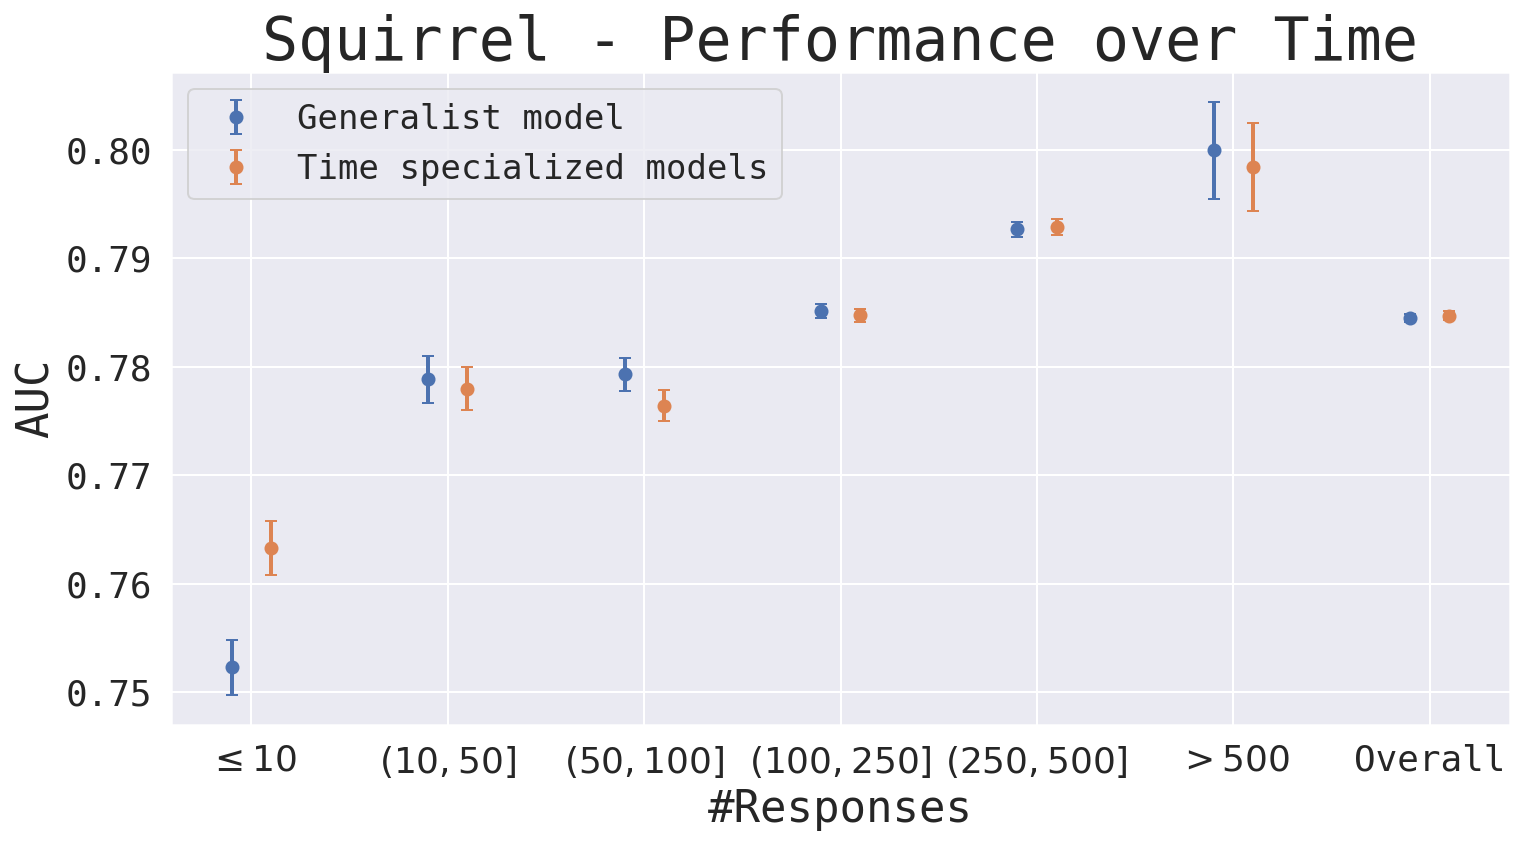

In [4]:
# Load data

dataset = "squirrel"

g_path = "./temporal/" + dataset + "_generalist_" + suf + ".pkl"
s_path = "./temporal/" + dataset + "_time_specialized_" + suf + ".pkl"

g_data = pickle.load(open(g_path, "rb"))
s_data = pickle.load(open(s_path, "rb"))

fig, ax = plt.subplots(figsize=(12,6))


for i, data in enumerate([g_data, s_data]):  # , "cross_te_accs"
    k = "cross_te_aucs"
    # k = "cross_te_accs"
    avgs = np.average(data[k], axis=0) 
    stds = 2 * np.std(data[k], axis=0) 
    print(avgs, stds)
    # ax.scatter(range(1, len(avgs) + 1), avgs, label=k[6:])

    pos = np.array(range(len(avgs))) + 0.90 + (0.20 * i)
    ax.errorbar(pos, avgs, yerr=stds, fmt='o',  capsize=3, label=labels[i])

plt.xlabel("#Responses")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
xlabels = ['$\leq 10$', '$(10, 50]$', '$(50, 100]$', '$(100, 250]$', "$(250, 500]$", "$>500$", "Overall"]
ax.set_xticklabels(xlabels)
plt.ylabel("AUC")

plt.title(DATASET_NAMES[dataset] + " - Performance over Time")
plt.legend()
plt.savefig(dataset + "_time.pdf")
plt.show()


squirrel
[0.75226237 0.77882393 0.77928313 0.78514638 0.79265901 0.79994444
 0.78444906] [0.00253678 0.00219051 0.0015642  0.00064512 0.00068464 0.00447727
 0.00036965]
[0.76328338 0.77795684 0.77641635 0.78473154 0.79285904 0.79837876
 0.78471513] [0.00247872 0.00198012 0.00145585 0.00061699 0.00074735 0.00406142
 0.00042997]
ednet_kt3
[0.68638955 0.72455047 0.72452259 0.72215768 0.72400011 0.73755136
 0.72942525] [0.0017611  0.00180067 0.00207618 0.00211498 0.00184311 0.00572583
 0.00230932]
[0.70749007 0.72712625 0.72468554 0.72392768 0.72567941 0.74469901
 0.73526289] [0.00105418 0.00180374 0.00162017 0.0021421  0.00192828 0.00586281
 0.00227472]
eedi
[0.76106363 0.78344474 0.78902689 0.79543439 0.79793607 0.79385742
 0.79009908] [0.00179344 0.0019454  0.00098774 0.00181531 0.00195032 0.00572532
 0.0013646 ]
[0.76567135 0.78295773 0.78823474 0.7957989  0.7981671  0.79575667
 0.79081253] [0.00144335 0.00185826 0.00088012 0.00177508 0.00220414 0.00541855
 0.00141103]
junyi_15
[0.7707

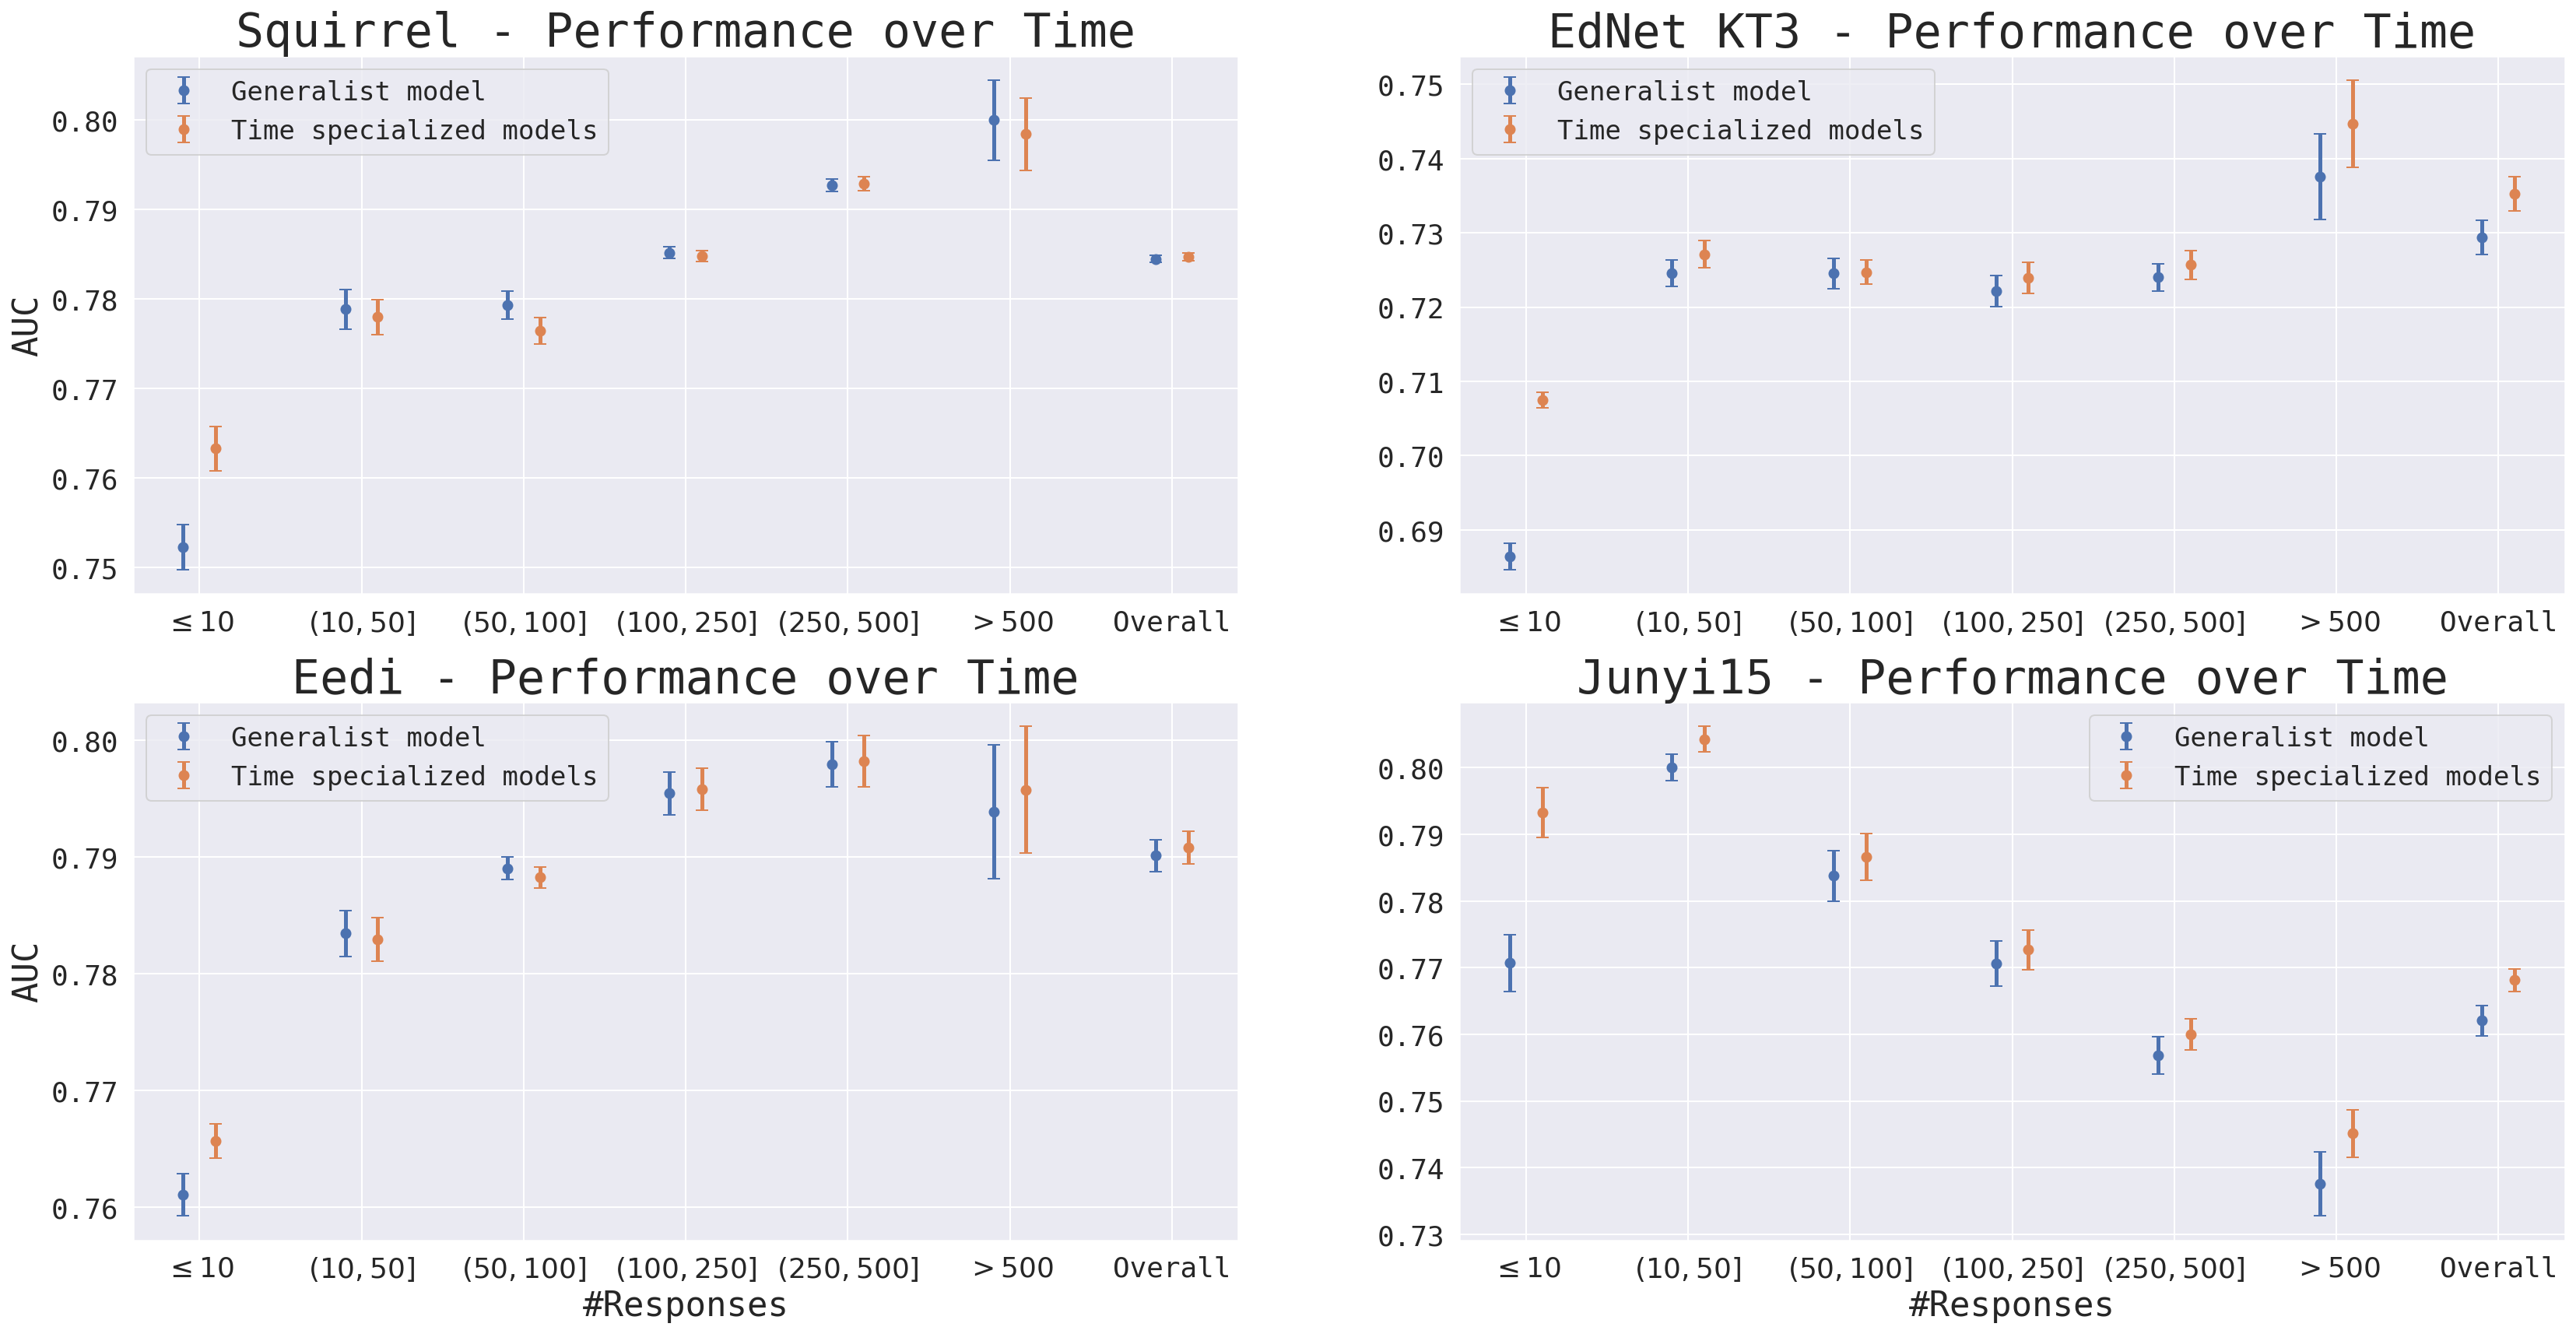

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(28, 14))


for i, dataset in enumerate(DATASET_NAMES):
    print(dataset)
    
    ax = axs[i // 2][i % 2]

    g_path = "./temporal/" + dataset + "_generalist_" + suf + ".pkl"
    s_path = "./temporal/" + dataset + "_time_specialized_" + suf + ".pkl"
    g_data = pickle.load(open(g_path, "rb"))
    s_data = pickle.load(open(s_path, "rb"))

    for j, data in enumerate([g_data, s_data]):  # , "cross_te_accs"
        k = "cross_te_aucs"
        # k = "cross_te_accs"
        avgs = np.average(data[k], axis=0) 
        stds = 2 * np.std(data[k], axis=0) 
        print(avgs, stds)
        # ax.scatter(range(1, len(avgs) + 1), avgs, label=k[6:])

        pos = np.array(range(len(avgs))) + 0.90 + (0.20 * j)
        ax.errorbar(pos, avgs, yerr=stds, fmt='o',  elinewidth=2.5, capsize=4, label=labels[j])

    if i // 2 == 1:
        ax.set_xlabel("#Responses")
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
    xlabels = ['$\leq 10$', '$(10, 50]$', '$(50, 100]$', '$(100, 250]$', "$(250, 500]$", "$>500$", "Overall"]
    ax.set_xticklabels(xlabels)

    if i % 2 == 0:
        ax.set_ylabel("AUC")
    ax.set_title(DATASET_NAMES[dataset] + " - Performance over Time")
    ax.legend()
plt.savefig("performance_over_time.pdf", bbox_inches='tight')   

plt.show()


